In [1]:
import matplotlib.pyplot as plt
plt.ion()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=22)
import numpy as np

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=22)

In [3]:
#For repeatability set a seed
seed = 123451
np.random.seed(seed)

## Knapsack problem definition

In [4]:
def knapsack(x, weights, values, weight_limit, r, beta):
    f = np.dot(x, values)
    g = np.dot(x, weights)
    penalty = r*np.max([0, g - weight_limit])**beta
    return f - penalty

In [5]:
# test
x = np.array([1,0,1])
w = np.array([100, 200, 300])
v = np.array([1, 2, 3])
W = 400
r = 20
beta = 2
print(knapsack(x, w, v, W, r, beta))

4


## Generating random population

In [6]:
def gen_pop(n_rows, n_cols):
    return np.random.randint(0, 1+1, size=(n_rows, n_cols))

In [7]:
# test
P = gen_pop(5, 3)
print(P)

[[0 0 1]
 [0 1 1]
 [0 1 1]
 [0 1 0]
 [0 0 0]]


## Truncation Selection

In [8]:
def truncation(f_vector, k=4, to_choose=2, maximise=True):
    if maximise:
        candidate_inds = np.argsort(-f_vector)[:k]
    else:
        candidate_inds = np.argsort(f_vector)[:k]
    try:
        picked_inds = np.random.choice(candidate_inds, 
                                   size=to_choose, 
                                   replace=False)
    except:
        picked_inds = np.random.choice(candidate_inds, 
                                   size=to_choose, 
                                   replace=False)
    return picked_inds

In [9]:
# test
fv = np.array([1,2, 4,6,-23])
truncation(fv)

array([1, 3])

## One-point Crossover function

In [10]:
def one_point_cx(a, b):
    inds = np.arange(a.shape[0])
    point = np.random.choice(inds)
    #print(point)
    c = np.concatenate([a[:point], b[point:]])
    d = np.concatenate([b[:point], a[point:]])
    return c, d

In [11]:
c1, c2 = one_point_cx(P[0], P[1])
print(c1, c2)

[0 0 1] [0 1 1]


## Bitwise Mutation

In [12]:
def bitwise_mutation(c, prob=None):
    if prob is None:
        prob = 1/len(c)
    bits = []
    for i in range(c.shape[0]):
        r = np.random.random()
        if r < prob:
            bits.append(int(not(c[i])))
        else:
            bits.append(c[i])
    return np.array(bits)

In [13]:
# test
c1p = bitwise_mutation(c1)
print(c1p)

[0 1 1]


## Genetic Algorithm

In [14]:
def GA(func, K, mut_rate=0.2, cx_rate=0.8, n_rows=10, n_cols=8,
      args=(), maximise=True):
    P = gen_pop(n_rows, n_cols)
    f_vector = np.array([func(i, *args) for i in P])
    if maximise:
        sorted_inds = np.argsort(-f_vector)
    else:
        sorted_inds = np.argsort(f_vector)
    xbest = [P[sorted_inds[0]]]
    fbest = [f_vector[sorted_inds[0]]]
    for i in range(K+1):
        pinds = truncation(f_vector, maximise=maximise)
        a, b = P[pinds][0], P[pinds][1]
        pcx = np.random.random()
        if pcx < cx_rate:
            c1, c2 = one_point_cx(a, b)
        else:
            c1, c2 = np.array(a), np.array(b)
        pm = np.random.random()
        if pcx < mut_rate:
            c1p = bitwise_mutation(c1)
            c2p = bitwise_mutation(c2)
        else:
            c1p, c2p = np.array(c1), np.array(c2)
        Pnew = np.concatenate([P, c1p[np.newaxis,:], 
                               c2p[np.newaxis,:]])
        f_vector = np.array([func(i, *args) for i in Pnew])
        if maximise:
            sorted_inds = np.argsort(-f_vector)
        else:
            sorted_inds = np.argsort(f_vector)
        P = Pnew[sorted_inds][:n_rows]
        f_vector = f_vector[sorted_inds][:n_rows]
        xbest.append(P[0])
        fbest.append(f_vector[0])
    return P, f_vector, xbest, fbest

In [15]:
# hyperparamters
K = 1000
# function paramters
w = np.array([600, 180, 250, 500, 400, 250, 380, 400])
v = np.array([1.35, 2.25, 2.5, 2.5, 1.75, 2.5, 2, 3.5])
W = 1200
r = 2
beta = 1
args = (w, v, W, r, beta)

In [16]:
res = GA(knapsack, K, args=args)

## Best individual fitness v number of gen

Text(0, 0.5, 'Best Fitness Value')

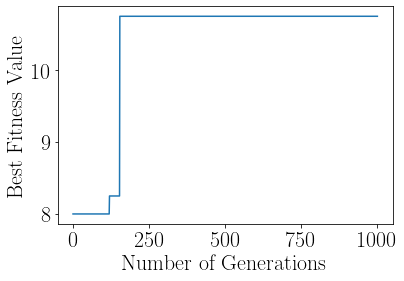

In [17]:
plt.plot(res[-1])
plt.xlabel("Number of Generations")
plt.ylabel("Best Fitness Value")

## Best solution

In [18]:
res[0][np.argmax(res[1])],np.max(res[1])

(array([0, 1, 1, 0, 0, 1, 0, 1]), 10.75)